### Correlations between CSIRO mean wave period and buoy observations

Objectives:
- Read .csv files containing buoy observations
- Read netcdf file of CSIRO reanalyses containing mean wave period
- Correlate ERA5 wave period to buoy observations
- Plot the correlations as scatter plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
import xarray as xr
from matplotlib.offsetbox import AnchoredText
import datetime as dt
%matplotlib inline

In [2]:
# Buoy files used for correlations
# - 1. Itajaí (PNBOIA)
# - 2. Rio Grande (PNBOIA)
# - 3. Tramandaí (Rede Ondas)

repar = 'tp'
par = 'Tp'
decimal_buoy =','
m_unit = 's'
reanalise = 'CSIRO'
errorvalue = 60

output_filename = 'csiro_tp.jpg'
output_path = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\validacao_fronteira'

filepath_buoy1 = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ondografos\pnboia'
buoy1_file = r'itajai.csv'
buoy1_loc = 'Itajaí (PNBOIA)'
buoy1_lat = -28.4
buoy1_lon = -47.600006
dtb1 = '''Período:
Abr/09 - Out/09
Fev/11 - Out/12
Fev/13 - Out/13
Nov/14 - Dez/15
Abr/16 - Jul/17'''

filepath_buoy2 = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ondografos\pnboia'
buoy2_file = r'riogrande.csv'
buoy2_loc = 'Rio Grande (PNBOIA)'
buoy2_lat = -31.60
buoy2_lon = -50.00
dtb2 = '''Período:
Abr/09 - Fev/11
Fev/11 - Jul/11
Jan/12 - Jan/13
Jun/13 - Dez/18'''

filepath_buoy3 = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ondografos\redeondas\florianopolis'
buoy3_loc = 'Florianópolis (Rede Ondas)'
buoy3_lat = -27.60
buoy3_lon = -48.00
dtb3 = '''Período:
Mar/02 - Set/03
Mai/04 - Jun/04'''

filepath_buoy4 = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ondografos\redeondas\tramandai'
buoy4_loc = 'Tramandaí (Rede Ondas)'
buoy4_lat = -30.00
buoy4_lon = -49.600006
dtb4 = '''Período:
Nov/06 - Set/07
Dez/13 - Mar/14
Jun/14 - Mai/15
Jan/16 - Jul/16'''


era_file = 'tp.nc'
filepath_era = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\csiro\00_19'


In [3]:
%cd ~
%cd $filepath_buoy1

C:\Users\Mariliasr
C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ondografos\pnboia


In [4]:
# Buoy 1

# Read file containing buoy data, create datetime column and subset it to datetime + variables

df_buoy = pd.read_csv(buoy1_file, sep=';', decimal=decimal_buoy,
                      na_values = -9999)
df_buoy.columns = ['year', 'month', 'day', 'hour', 'Hs', 'Tp', 'MDir']


# Create datetime column from year, month, day, hour

datetime = pd.to_datetime(df_buoy.iloc[:, :4])


#Create new dataframe with filtered data

buoy_par = df_buoy[par]
buoy_par[buoy_par>errorvalue] = np.nan
buoy_par[buoy_par<0] = np.nan
buoy1_par = {'datetime': datetime, par: buoy_par}
buoy1_par = pd.DataFrame(buoy1_par)
buoy1_par['datetime'] = buoy1_par['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')


# Create unique dataarrays for Hs, filter by time

buoy1_par = buoy1_par[['datetime', par]].dropna()
buoy1_par = buoy1_par[(buoy1_par['datetime'] > '1978-12-12 23:00:00') & (buoy1_par['datetime'] < '2019-01-01 00:00:00')]


C:\Users\Mariliasr\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Mariliasr\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
%cd ~
%cd $filepath_buoy2

C:\Users\Mariliasr
C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ondografos\pnboia


In [6]:
# Buoy 2

# Read file containing buoy data, create datetime column and subset it to datetime + variables

df_buoy = pd.read_csv(buoy2_file, sep=';', decimal=decimal_buoy, 
                      na_values = -9999)
df_buoy.columns = ['year', 'month', 'day', 'hour', 'Hs', 'Tp', 'MDir']


# Create datetime column from year, month, day, hour

datetime = pd.to_datetime(df_buoy.iloc[:, :4])

#Create new dataframe with filtered data

buoy_par = df_buoy[par]
buoy_par[buoy_par>errorvalue] = np.nan
buoy_par[buoy_par<0] = np.nan
buoy2_par = {'datetime': datetime, par: buoy_par}
buoy2_par = pd.DataFrame(buoy2_par)
buoy2_par['datetime'] = buoy2_par['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Create unique dataarrays for Hs, filter by time

buoy2_par = buoy2_par[['datetime', par]].dropna()
buoy2_par = buoy2_par[(buoy2_par['datetime'] > '1978-12-12 23:00:00') & (buoy2_par['datetime'] < '2019-01-01 00:00:00')]


In [7]:
%cd ~
%cd $filepath_buoy3

C:\Users\Mariliasr
C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ondografos\redeondas\florianopolis


In [8]:
# Buoy 3

import glob, os    

buoy3_files = glob.glob(os.path.join(filepath_buoy3, '*.txt'))
df_buoy = pd.concat((pd.read_csv(f, sep='\t', skiprows=1, header=None, decimal='.') for f in buoy3_files))
df_buoy.columns = ['year', 'month', 'day', 'hour', 'min', 'sec', 'Hs', 'Tp', 'MDir']
df_buoy['MDir'] = pd.to_numeric(df_buoy.MDir, errors='coerce')

# Create datetime column from year, month, day, hour

datetime = pd.to_datetime(df_buoy.iloc[:, :4])

#Create new dataframe with filtered data

buoy_par = df_buoy[par]
buoy_par[buoy_par>errorvalue] = np.nan
buoy_par[buoy_par<0] = np.nan

# Downsample data to daily means

df = pd.DataFrame(index=datetime)
buoy_par = buoy_par.tolist()
df[par] = buoy_par
buoy3_par = pd.DataFrame()
buoy3_par[par] = df[par].resample('D').mean().dropna()
buoy3_par['datetime'] = buoy3_par.index
buoy3_par['datetime'] = buoy3_par['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Create unique dataarrays for Hs, filter by time

buoy3_par = buoy3_par[(buoy3_par['datetime'] > '1978-12-12 23:00:00') & (buoy3_par['datetime'] < '2019-01-01 00:00:00')]


C:\Users\Mariliasr\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Mariliasr\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
%cd ~
%cd $filepath_buoy4

C:\Users\Mariliasr
C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\ondografos\redeondas\tramandai


In [10]:
# Buoy 4

import glob, os    

buoy4_files = glob.glob(os.path.join(filepath_buoy4, '*.txt'))
df_buoy = pd.concat((pd.read_csv(f, sep='\t', skiprows=1, header=None, decimal='.') for f in buoy4_files))
df_buoy.columns = ['year', 'month', 'day', 'hour', 'min', 'sec', 'Hs', 'Tp', 'MDir']
df_buoy['MDir'] = pd.to_numeric(df_buoy.MDir, errors='coerce')

# Create datetime column from year, month, day, hour

datetime = pd.to_datetime(df_buoy.iloc[:, :4])

#Create new dataframe with filtered data

buoy_par = df_buoy[par]
buoy_par[buoy_par>errorvalue] = np.nan
buoy_par[buoy_par<0] = np.nan

# Downsample data to daily means

df = pd.DataFrame(index=datetime)
buoy_par = buoy_par.tolist()
df[par] = buoy_par
buoy4_par = pd.DataFrame()
buoy4_par[par] = df[par].resample('H').mean().dropna()
buoy4_par['datetime'] = buoy4_par.index
buoy4_par['datetime'] = buoy4_par['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Create unique dataarrays for Hs, filter by time

buoy4_par = buoy4_par[(buoy4_par['datetime'] > '1978-12-12 23:00:00') & (buoy4_par['datetime'] < '2019-01-01 00:00:00')]


C:\Users\Mariliasr\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Mariliasr\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
%cd ~
%cd $filepath_era

C:\Users\Mariliasr
C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\datasets\csiro\00_19


In [12]:
era_ds = xr.open_dataset(era_file)
era_ds = era_ds.assign_coords(latitude=((era_ds.latitude.astype(float))))
era_ds = era_ds.assign_coords(longitude=((era_ds.longitude.astype(float))))
era_ds[repar].sel(latitude=buoy1_lat, longitude=buoy1_lon, method='nearest')

<xarray.DataArray 'tp' (time: 165096)>
[165096 values with dtype=float32]
Coordinates:
    longitude  float64 -47.6
    latitude   float64 -28.4
  * time       (time) datetime64[ns] 2000-01-01 ... 2018-10-31T23:00:00.000013440

In [13]:
# Open ERA dataset and create a dataframe for the buoy point

era_ds = xr.open_dataset(era_file)
era_ds = era_ds.assign_coords(latitude=((era_ds.latitude.astype(float))))
era_ds = era_ds.assign_coords(longitude=((era_ds.longitude.astype(float))))


# ERA @ Buoy 1
era1_ds = era_ds[repar].sel(latitude=buoy1_lat, longitude=buoy1_lon, method='nearest')
era1_par = era1_ds.values

# ERA @ Buoy 2
era2_ds = era_ds[repar].sel(latitude=buoy2_lat, longitude=buoy2_lon, method='nearest')
era2_par = era2_ds.values

# ERA @ Buoy 3
era3_ds = era_ds[repar].sel(latitude=buoy3_lat, longitude=buoy3_lon, method='nearest')
era3r_par = era3_ds.values

# ERA @ Buoy 4
era4_ds = era_ds[repar].sel(latitude=buoy4_lat, longitude=buoy4_lon, method='nearest')
era4_par = era4_ds.values


# Creating CSIRO timestamps as they're messy

time_era = pd.to_datetime(era_ds.time.values)

year = time_era.year.tolist()
month = time_era.month.tolist()
day = time_era.day.tolist()
ndays = len(time_era)//24
hour_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
             13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
hour = hour_list*ndays

df = pd.DataFrame({'year': year,
                   'month': month,
                   'day': day,
                   'hour': hour
                  })

time_era = pd.to_datetime(df)

xr.Dataset.close(era_ds)

# B1 dataset
era1_par = {'era_time': time_era, 'era_par': era1_par}
era1_par = pd.DataFrame(era1_par)
era1_par['era_time'] = era1_par['era_time'].dt.strftime('%Y-%m-%d %H:%M:%S')

# B2 dataset
era2_par = {'era_time': time_era, 'era_par': era2_par}
era2_par = pd.DataFrame(era2_par)
era2_par['era_time'] = era2_par['era_time'].dt.strftime('%Y-%m-%d %H:%M:%S')

# B3 dataset
df = pd.DataFrame(index=time_era)
era3r_par = era3r_par.tolist()
df['era_par'] = era3r_par
era3_par = pd.DataFrame()
era3_par['era_par'] = df['era_par'].resample('D').mean().dropna()
era3_par['era_time'] = era3_par.index
era3_par['era_time'] = era3_par['era_time'].dt.strftime('%Y-%m-%d %H:%M:%S')

# B4 dataset
era4_par = {'era_time': time_era, 'era_par': era4_par}
era4_par = pd.DataFrame(era4_par)
era4_par['era_time'] = era4_par['era_time'].dt.strftime('%Y-%m-%d %H:%M:%S')



In [14]:
# Create list of buoy timestamps for filtering ERA data

time_buoy1 = buoy1_par['datetime'].tolist()
time_buoy2 = buoy2_par['datetime'].tolist()
time_buoy3 = buoy3_par['datetime'].tolist()
time_buoy4 = buoy4_par['datetime'].tolist()


In [15]:
# Filter ERA dataset by buoy data

era_at_buoy1 = era1_par.loc[era1_par['era_time'].isin(time_buoy1)]
era_at_buoy2 = era2_par.loc[era2_par['era_time'].isin(time_buoy2)]
era_at_buoy3 = era3_par.loc[era3_par['era_time'].isin(time_buoy3)]
era_at_buoy4 = era4_par.loc[era4_par['era_time'].isin(time_buoy4)]


In [16]:
# Calculate correl indexes and trendline

from scipy import stats

# B1 vs. ERA
(r1, p1) = stats.pearsonr(era_at_buoy1['era_par'], buoy1_par[par])
rg = np.polyfit(buoy1_par[par], era_at_buoy1['era_par'], 1)
tl1 = np.poly1d(rg)

# B2 vs. ERA
(r2, p2) = stats.pearsonr(era_at_buoy2['era_par'], buoy2_par[par])
rg = np.polyfit(buoy2_par[par], era_at_buoy2['era_par'], 1)
tl2 = np.poly1d(rg)

# B3 vs. ERA
(r3, p3) = stats.pearsonr(era_at_buoy3['era_par'], buoy3_par[par])
rg = np.polyfit(buoy3_par[par], era_at_buoy3['era_par'], 1)
tl3 = np.poly1d(rg)

# B4 vs. ERA
(r4, p4) = stats.pearsonr(era_at_buoy4['era_par'], buoy4_par[par])
rg = np.polyfit(buoy4_par[par], era_at_buoy4['era_par'], 1)
tl4 = np.poly1d(rg)

In [17]:
%cd ~
%cd $output_path

C:\Users\Mariliasr
C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\validacao_fronteira


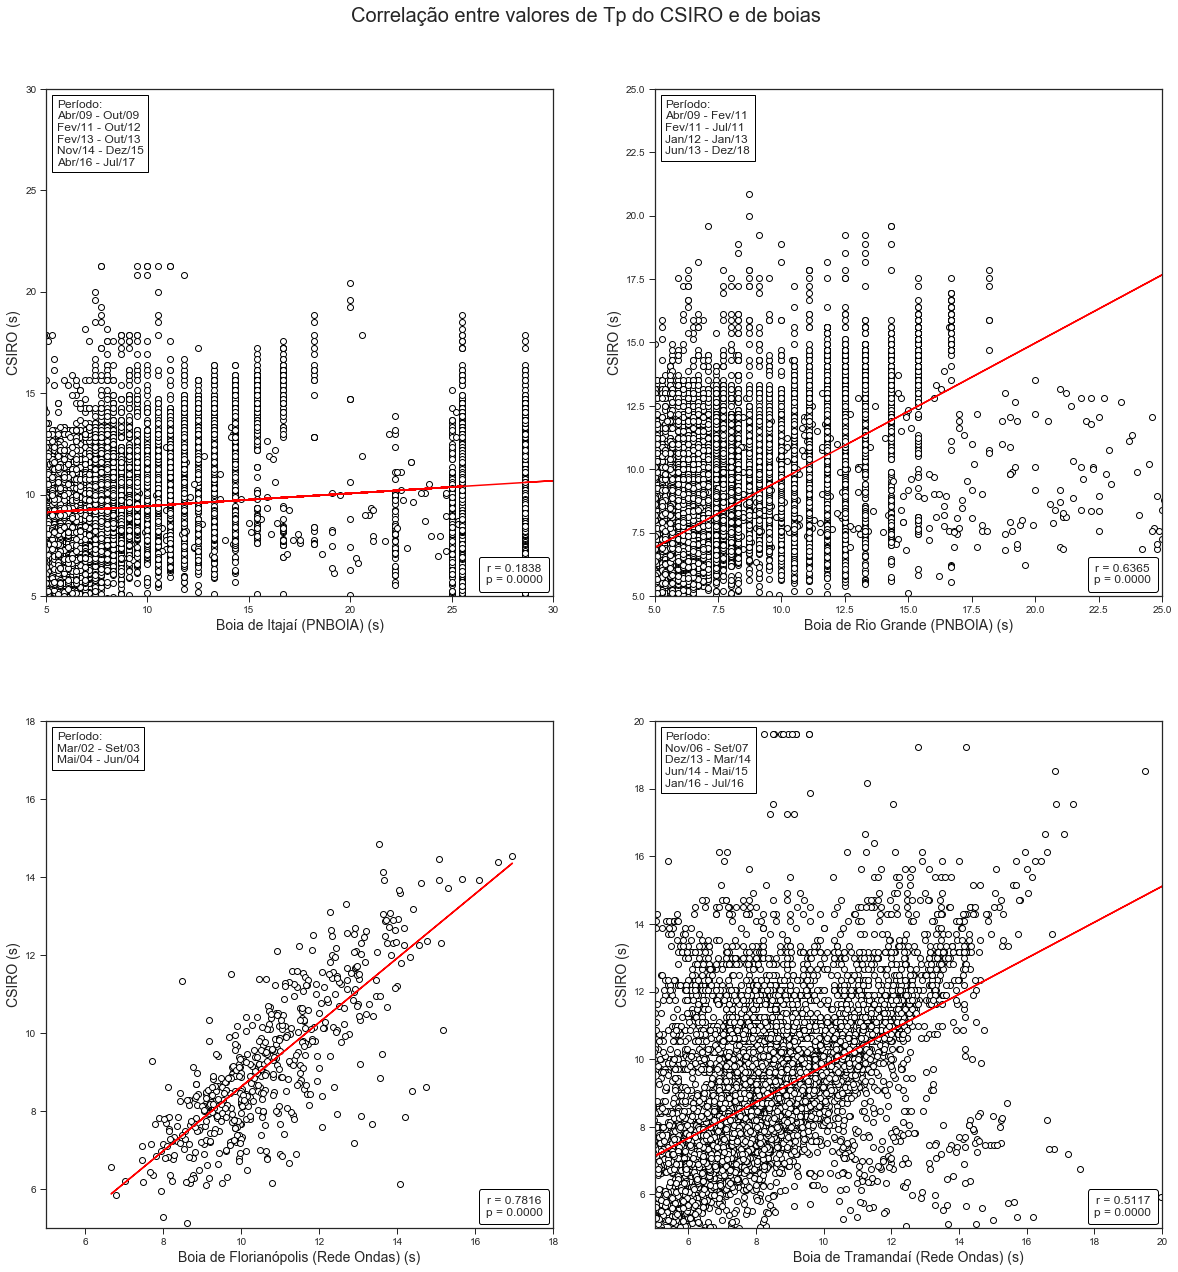

In [21]:
# Plot 

plt.style.use('seaborn-white')

correl_plots = plt.figure(figsize=(20,20))

# ERA @ B1
sp1 = plt.subplot(221, aspect='equal')
plt.scatter(buoy1_par[par], era_at_buoy1['era_par'], c='white', edgecolors='black')
plt.plot(buoy1_par[par], tl1(buoy1_par[par]), color='red', linestyle='-')
plt.axis(xmin=5, xmax=30, ymin=5, ymax=30)
plt.tick_params(direction='out', length=6, width=1)
plt.xlabel('Boia de {} ({})'.format(buoy1_loc, m_unit), **dict(size=14))
plt.ylabel('{} ({})'.format(reanalise, m_unit), **dict(size=14))
at1 = AnchoredText(f'''r = {r1:0.4f}
p = {p1:0.4f}''', prop=dict(size=12,  ma='center'), 
                   frameon=True, loc='lower right')
at1.patch.set_boxstyle("round,pad=0.15,rounding_size=0.2")
at2 = AnchoredText('{}'.format(dtb1), prop=dict(size=12,  ma='left'), 
                  frameon=True, loc='upper left')
sp1.add_artist(at1)
sp1.add_artist(at2)


# ERA @ B2
sp2 = plt.subplot(222, aspect='equal')
plt.scatter(buoy2_par[par], era_at_buoy2['era_par'], c='white', edgecolors='black')
plt.plot(buoy2_par[par], tl2(buoy2_par[par]), color='red', linestyle='-')
plt.axis(xmin=5, xmax=25, ymin=5, ymax=25)
plt.tick_params(direction='out', length=6, width=1)
plt.xlabel('Boia de {} ({})'.format(buoy2_loc, m_unit), **dict(size=14))
plt.ylabel('{} ({})'.format(reanalise, m_unit), **dict(size=14))
at1 = AnchoredText(f'''r = {r2:0.4f}
p = {p2:0.4f}''', prop=dict(size=12,  ma='center'), 
                  frameon=True, loc='lower right')
at1.patch.set_boxstyle("round,pad=0.15,rounding_size=0.2")
at2 = AnchoredText('{}'.format(dtb2), prop=dict(size=12,  ma='left'), 
                  frameon=True, loc='upper left')
sp2.add_artist(at1)
sp2.add_artist(at2)


# ERA @ B3
sp3 = plt.subplot(223, aspect='equal')
plt.scatter(buoy3_par[par], era_at_buoy3['era_par'], c='white', edgecolors='black')
plt.plot(buoy3_par[par], tl3(buoy3_par[par]), color='red', linestyle='-')
plt.axis(xmin=5, xmax=18, ymin=5, ymax=18)
plt.tick_params(direction='out', length=6, width=1)
plt.xlabel('Boia de {} ({})'.format(buoy3_loc, m_unit), **dict(size=14))
plt.ylabel('{} ({})'.format(reanalise, m_unit), **dict(size=14))
at1 = AnchoredText(f'''r = {r3:0.4f}
p = {p3:0.4f}''', prop=dict(size=12,  ma='center'), 
                  frameon=True, loc='lower right')
at1.patch.set_boxstyle("round,pad=0.15,rounding_size=0.2")
at2 = AnchoredText('{}'.format(dtb3), prop=dict(size=12,  ma='left'), 
                  frameon=True, loc='upper left')
sp3.add_artist(at1)
sp3.add_artist(at2)

# ERA @ B4
sp4 = plt.subplot(224, aspect='equal')
plt.scatter(buoy4_par[par], era_at_buoy4['era_par'], c='white', edgecolors='black')
plt.plot(buoy4_par[par], tl4(buoy4_par[par]), color='red', linestyle='-')
plt.axis(xmin=5, xmax=20, ymin=5, ymax=20)
plt.tick_params(direction='out', length=6, width=1)
plt.xlabel('Boia de {} ({})'.format(buoy4_loc, m_unit), **dict(size=14))
plt.ylabel('{} ({})'.format(reanalise, m_unit), **dict(size=14))
at1 = AnchoredText(f'''r = {r4:0.4f}
p = {p4:0.4f}''', prop=dict(size=12,  ma='center'), 
                  frameon=True, loc='lower right')
at1.patch.set_boxstyle("round,pad=0.15,rounding_size=0.2")
at2 = AnchoredText('{}'.format(dtb4), prop=dict(size=12,  ma='left'), 
                  frameon=True, loc='upper left')
sp4.add_artist(at1)
sp4.add_artist(at2)

correl_plots.suptitle('Correlação entre valores de {} do {} e de boias'.format(par, reanalise), 
                      fontsize=20)
#correl_plots.tight_layout()
correl_plots.subplots_adjust(top=0.93)

plt.savefig(output_filename)

plt.show()
